In [5]:
import pandas as pd
import numpy as np
import joblib

# Load the datasets and scaler
NO3_train = pd.read_csv('preprocessed_datasets/NO3_train.csv')
NO3_val = pd.read_csv('preprocessed_datasets/NO3_val.csv')
NO3_test = pd.read_csv('preprocessed_datasets/NO3_test.csv')
NO3scaler = joblib.load('preprocessed_datasets/NO3scaler.pkl')

NO3_train.head()

,timestamp,consumption,temperature,time_of_day,time_of_week,time_of_year,lag_24_hours,lag_1_hour
0,2017-05-02 00:00:00+00:00,0.227701,0.450877,0.000000,0.166667,0.331507,0.246874,0.236276
1,2017-05-02 01:00:00+00:00,0.222187,0.450877,0.043478,0.166667,0.331507,0.248087,0.227701
2,2017-05-02 02:00:00+00:00,0.226947,0.443860,0.086957,0.166667,0.331507,0.248142,0.222187
3,2017-05-02 03:00:00+00:00,0.236823,0.431579,0.130435,0.166667,0.331507,0.250252,0.226947
4,2017-05-02 04:00:00+00:00,0.287226,0.426316,0.173913,0.166667,0.331507,0.268047,0.236823


In [6]:
# Splitting the datasets into features and targets and converting them into numpy arrays

NO3_train = NO3_train.drop('timestamp', axis=1)
NO3_val = NO3_val.drop('timestamp', axis=1)
NO3_test = NO3_test.drop('timestamp', axis=1)

# Separate features and targets for the training set
NO3_train_x = NO3_train.drop('consumption', axis=1).to_numpy(dtype=np.float32)
NO3_train_y = NO3_train['consumption'].to_numpy(dtype=np.float32)

# Separate features and targets for the validation set
NO3_val_x = NO3_val.drop('consumption', axis=1).to_numpy(dtype=np.float32)
NO3_val_y = NO3_val['consumption'].to_numpy(dtype=np.float32)

# Separate features and targets for the test set
NO3_test_x = NO3_test.drop('consumption', axis=1).to_numpy(dtype=np.float32)
NO3_test_y = NO3_test['consumption'].to_numpy(dtype=np.float32)

In [7]:
NO3_train_x.shape
NO3_train_x

array([[0.4508772 , 0.        , 0.16666667, 0.33150685, 0.24687432,
        0.23627639],
       [0.4508772 , 0.04347826, 0.16666667, 0.33150685, 0.2480866 ,
        0.22770137],
       [0.44385964, 0.08695652, 0.16666667, 0.33150685, 0.24814197,
        0.22218709],
       ...,
       [0.4280702 , 0.9130435 , 0.6666667 , 0.9972603 , 0.5991212 ,
        0.5514717 ],
       [0.42982456, 0.95652175, 0.6666667 , 0.9972603 , 0.5837774 ,
        0.5377186 ],
       [0.4280702 , 1.        , 0.6666667 , 0.9972603 , 0.55707616,
        0.52567935]], dtype=float32)

## Feed-forward neural network

Epoch 1/3
   1/1279 ━━━━━━━━━━━━━━━━━━━━ 3:35 169ms/step - loss: 0.2183

c:\Users\maxgu\Projects\.venv\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1279/1279 ━━━━━━━━━━━━━━━━━━━━ 1s 549us/step - loss: 0.0340 - val_loss: 0.0044
Epoch 2/3
1279/1279 ━━━━━━━━━━━━━━━━━━━━ 1s 483us/step - loss: 0.0038 - val_loss: 0.0014
Epoch 3/3
1279/1279 ━━━━━━━━━━━━━━━━━━━━ 1s 450us/step - loss: 0.0014 - val_loss: 0.0011
273/273 ━━━━━━━━━━━━━━━━━━━━ 0s 306us/step - loss: 0.0013  
Validation loss: 0.0011160585563629866


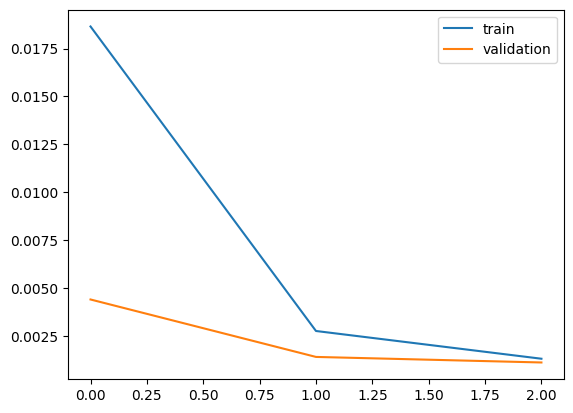

In [8]:
from models.feedForwardNN import feedForwardNN

model = feedForwardNN()  # Instantiate your model
history = model.fit(NO3_train_x,
                    NO3_train_y,
                    NO3_val_x,
                    NO3_val_y,
                    epochs=3)  # Train the model

model.evaluate(NO3_val_x, NO3_val_y)  # Validate the model

model.plot_history('models/FF_NO3_3epochs_history.png')  # Visualize training and validation loss

model.save('models/FF_NO3_3epochs.keras')  # Save the model



In [9]:
from keras.models import load_model

# Load the model
model = load_model('models/FF_NO3_300epochs.keras')

test_x.shape: (8736, 6)
test_y.shape: (8736,)
test_x_copy[24:29]: [[0.29298246 0.         0.16666667 0.00547945 0.59560496 0.6210946 ]
 [0.29649124 0.04347826 0.16666667 0.00547945 0.58923537 0.        ]
 [0.3        0.08695652 0.16666667 0.00547945 0.58530515 0.        ]
 [0.30350876 0.13043478 0.16666667 0.00547945 0.59190637 0.        ]
 [0.30526316 0.17391305 0.16666667 0.00547945 0.6127612  0.        ]]
test_y_copy[24:29]: [0.5878257  0.57562536 0.5751212  0.57904875 0.59786487]


C:\Users\maxgu\AppData\Local\Temp\ipykernel_18800\3217516098.py:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  test_x_copy[i+1, -1] = prediction


test_y_copy.shape: (48,)
predictions.shape: (24,)


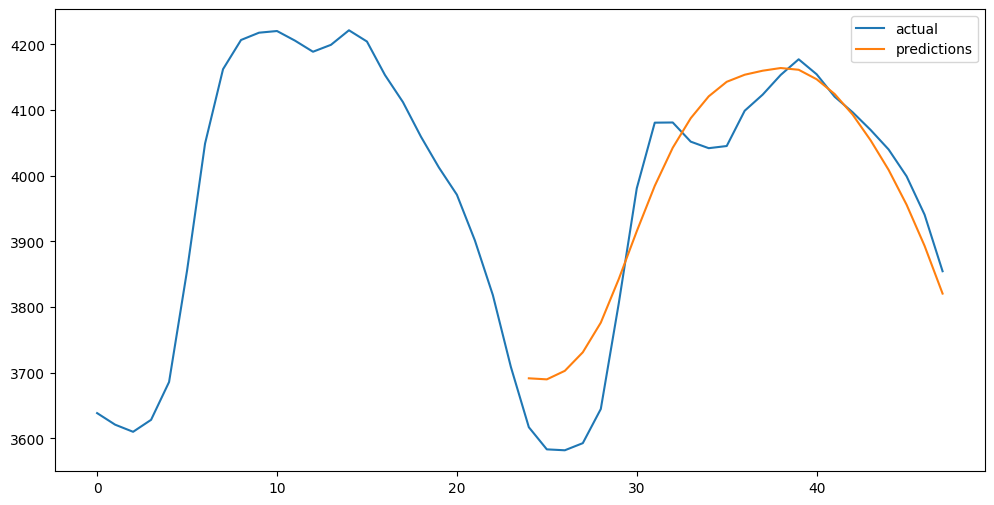

In [20]:
import matplotlib.pyplot as plt

print(f'test_x.shape: {NO3_test_x.shape}')
print(f'test_y.shape: {NO3_test_y.shape}')

def predict_1day(model, test_x, test_y, startHour=0, scaler=NO3scaler):
    # These are hardcoded since the function would need to be
    # updated to handle longer sequences
    predistionStart=24
    timesteps=48
    test_x_copy = test_x[startHour:timesteps].copy()
    test_y_copy = test_y[startHour:timesteps].copy()

    # Removing the data from the 1 hour lag feature
    test_x_copy[predistionStart + 1:, -1] = 0
    predictions = []

    print(f'test_x_copy[24:29]: {test_x_copy[24:29]}')
    print(f'test_y_copy[24:29]: {test_y_copy[24:29]}')
    for i in range(24, timesteps):
        prediction = model.predict(test_x_copy[i].reshape(1, -1), verbose=0)
        predictions.append(prediction[0][0])
        # Adding prediction data to the next 1 hour lag feature
        if i < len(test_x_copy)-1:
            test_x_copy[i+1, -1] = prediction

    
    # test_y_copy shape
    print(f'test_y_copy.shape: {test_y_copy.shape}')

    # Rescale the data to original values
    predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1)).reshape(-1)
    test_y_copy = scaler.inverse_transform(test_y_copy.reshape(-1, 1)).reshape(-1)

    print(f'predictions.shape: {predictions.shape}')

    plt.figure(figsize=(12, 6))
    plt.plot(test_y_copy, label='actual')
    plt.plot(range(24, len(test_y_copy)), predictions, label='predictions') 
    plt.legend()
    plt.show()

# test the function
predict_1day(model, NO3_test_x, NO3_test_y)